In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

## Loading the dataset

Data Set Source:

https://www.kaggle.com/datasets/gianinamariapetrascu/gender-inequality-index/data

In [ ]:
 # Reading as df with pandas

gender_df = pd.read_csv('/content/Gender_Inequality_Index.csv')

## Data understanding

In [ ]:
gender_df.head(5)

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


In [ ]:
gender_df.shape

(195, 11)

In [ ]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Human_development      191 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     184 non-null    float64
 5   Adolescent_birth_rate  195 non-null    float64
 6   Seats_parliament       193 non-null    float64
 7   F_secondary_educ       177 non-null    float64
 8   M_secondary_educ       177 non-null    float64
 9   F_Labour_force         180 non-null    float64
 10  M_Labour_force         180 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.9+ KB


## Data Cleaning

Null Values

In [ ]:
# Showing the number of null values

gender_df.isnull().sum()

Country                   0
Human_development         4
GII                      25
Rank                     25
Maternal_mortality       11
Adolescent_birth_rate     0
Seats_parliament          2
F_secondary_educ         18
M_secondary_educ         18
F_Labour_force           15
M_Labour_force           15
dtype: int64

% of Null value in dataset

In [ ]:
(gender_df.isnull().sum()/gender_df.shape[0])*100

Country                   0.000000
Human_development         2.051282
GII                      12.820513
Rank                     12.820513
Maternal_mortality        5.641026
Adolescent_birth_rate     0.000000
Seats_parliament          1.025641
F_secondary_educ          9.230769
M_secondary_educ          9.230769
F_Labour_force            7.692308
M_Labour_force            7.692308
dtype: float64

<Axes: >

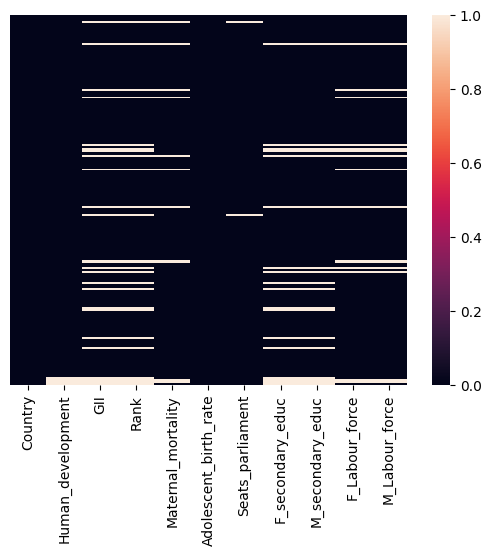

In [ ]:
sns.heatmap(gender_df.isnull(), yticklabels = False)

Dropping null values

In [ ]:
gender_df.dropna(inplace=True)

In [ ]:

gender_df.isnull().sum()

Country                  0
Human_development        0
GII                      0
Rank                     0
Maternal_mortality       0
Adolescent_birth_rate    0
Seats_parliament         0
F_secondary_educ         0
M_secondary_educ         0
F_Labour_force           0
M_Labour_force           0
dtype: int64

checking for duplicated values



In [ ]:
gender_df.duplicated().sum()

0

Adding country codes column

In [ ]:
!pip install pycountry

import pycountry

In [ ]:
input_countries = gender_df['Country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country) for country in input_countries]

print(codes)

['CHE', 'NOR', 'ISL', 'AUS', 'DNK', 'SWE', 'IRL', 'DEU', 'NLD', 'FIN', 'SGP', 'BEL', 'NZL', 'CAN', 'LUX', 'GBR', 'JPN', None, 'USA', 'ISR', 'MLT', 'SVN', 'AUT', 'ARE', 'ESP', 'FRA', 'CYP', 'ITA', 'EST', 'CZE', 'GRC', 'POL', 'BHR', 'LTU', 'SAU', 'PRT', 'LVA', 'HRV', 'CHL', 'QAT', 'SVK', 'HUN', 'ARG', 'TUR', 'MNE', 'KWT', 'BRN', 'RUS', 'ROU', 'OMN', 'BHS', 'KAZ', 'TTO', 'CRI', 'URY', 'BLR', 'PAN', 'MYS', 'GEO', 'MUS', 'SRB', 'THA', 'ALB', 'BGR', 'BRB', 'LKA', 'BIH', None, 'UKR', 'MKD', 'CHN', 'DOM', None, 'CUB', 'PER', 'ARM', 'MEX', 'BRA', 'COL', 'VCT', 'MDV', 'DZA', 'AZE', 'TON', 'TKM', 'ECU', 'MNG', 'EGY', 'TUN', 'FJI', 'SUR', 'UZB', 'JOR', 'LBY', 'PRY', 'LCA', 'GUY', 'ZAF', 'JAM', 'WSM', 'GAB', 'LBN', 'IDN', 'VNM', 'PHL', 'BWA', None, 'KGZ', None, 'IRQ', 'TJK', 'BLZ', 'MAR', 'SLV', 'NIC', 'BTN', 'CPV', 'BGD', 'IND', 'GHA', 'GTM', 'HND', 'STP', 'NAM', 'LAO', 'TLS', 'NPL', 'SWZ', 'KHM', 'ZWE', 'AGO', 'MMR', 'SYR', 'CMR', 'KEN', 'COG', 'ZMB', 'PNG', 'MRT', 'CIV', None, 'PAK', 'TGO', 'HTI

In [ ]:
gender_df['ISO-Code']=codes

In [ ]:
gender_df.head(5)

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,ISO-Code
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,CHE
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,NOR
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5,ISL
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5,AUS
5,Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7,DNK


In [ ]:
# Rearranging the columns

# Move ISO-Code column to the first position
iso_code_col = gender_df.pop('ISO-Code')
gender_df.insert(0, 'ISO-Code', iso_code_col)


In [ ]:
# Rearranged columns

gender_df.head(2)

,ISO-Code,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,CHE,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,NOR,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0


# Data Export

In [ ]:
# Exporting processed data for further analysis in flourish

gender_df.to_csv("Cleaned gender Data.csv",index=False)